#
# News Article Classification Project
#
# This script covers the entire pipeline for a text classification project:
# 1. Data Collection: Fetches the 20 Newsgroups dataset, focusing on 3 categories.
# 2. Preprocessing: Cleans the text data.
# 3. Feature Extraction: Converts text into numerical features using TF-IDF.
# 4. EDA: Visualizes the category distribution.
# 5. Model Training: Trains Logistic Regression, Naive Bayes, and SVM models.
# 6. Evaluation: Compares models using accuracy, F1-score, and confusion matrices.
# 7. Feature Importance: Identifies and visualizes the top keywords for each category.
#

Loading dataset for categories: ['rec.sport.hockey', 'talk.politics.misc', 'sci.electronics']

Number of articles loaded: 2758
Number of categories: 3
Number of articles after removing empty ones: 2689

Performing Exploratory Data Analysis...


<ipython-input-4-3032142151>:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='category_name', data=df, palette='viridis')


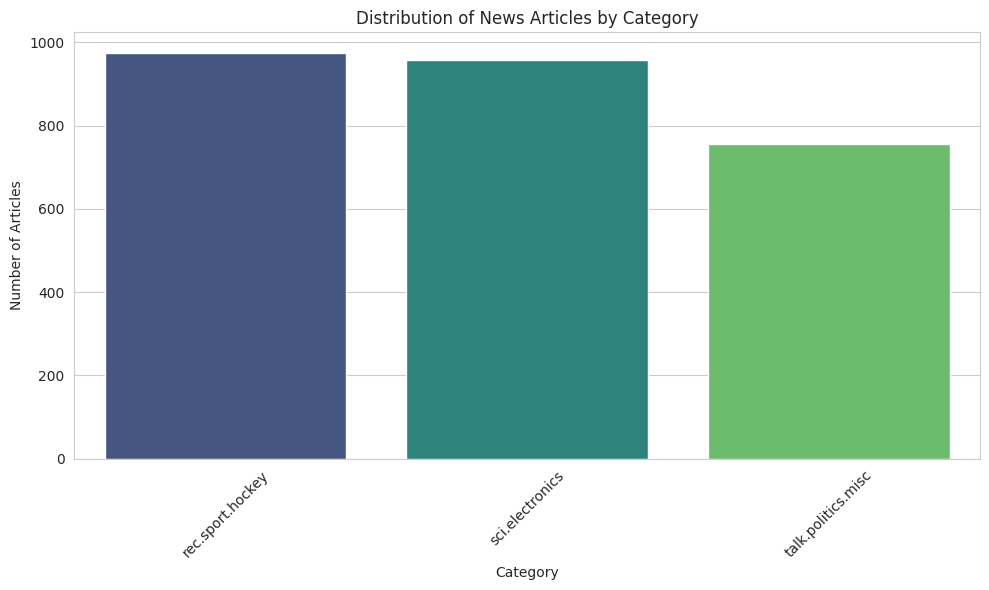


Extracting features using TF-IDF...
Shape of the TF-IDF matrix: (2689, 14258)
Training set size: 2151 samples
Test set size: 538 samples

Training and evaluating models...
Performing 5-fold cross-validation for Logistic Regression...
  - Mean Accuracy: 0.9382 (+/- 0.0140)
Performing 5-fold cross-validation for Naive Bayes...
  - Mean Accuracy: 0.9512 (+/- 0.0198)
Performing 5-fold cross-validation for Support Vector Machine (SVM)...
  - Mean Accuracy: 0.9428 (+/- 0.0205)

Best model based on cross-validation: Naive Bayes with accuracy 0.9512
Training the final Naive Bayes model on the full training data...

Evaluating the best model on the test set...
Final Test Accuracy: 0.9442

Classification Report:
                    precision    recall  f1-score   support

  rec.sport.hockey       0.92      0.97      0.95       195
   sci.electronics       0.96      0.96      0.96       192
talk.politics.misc       0.96      0.88      0.92       151

          accuracy                           

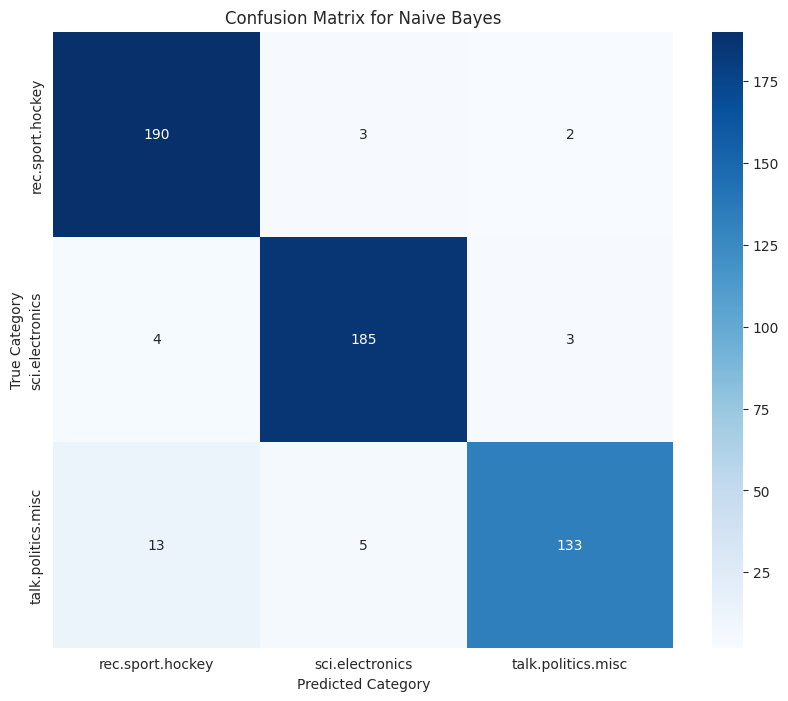


Identifying and plotting important features...


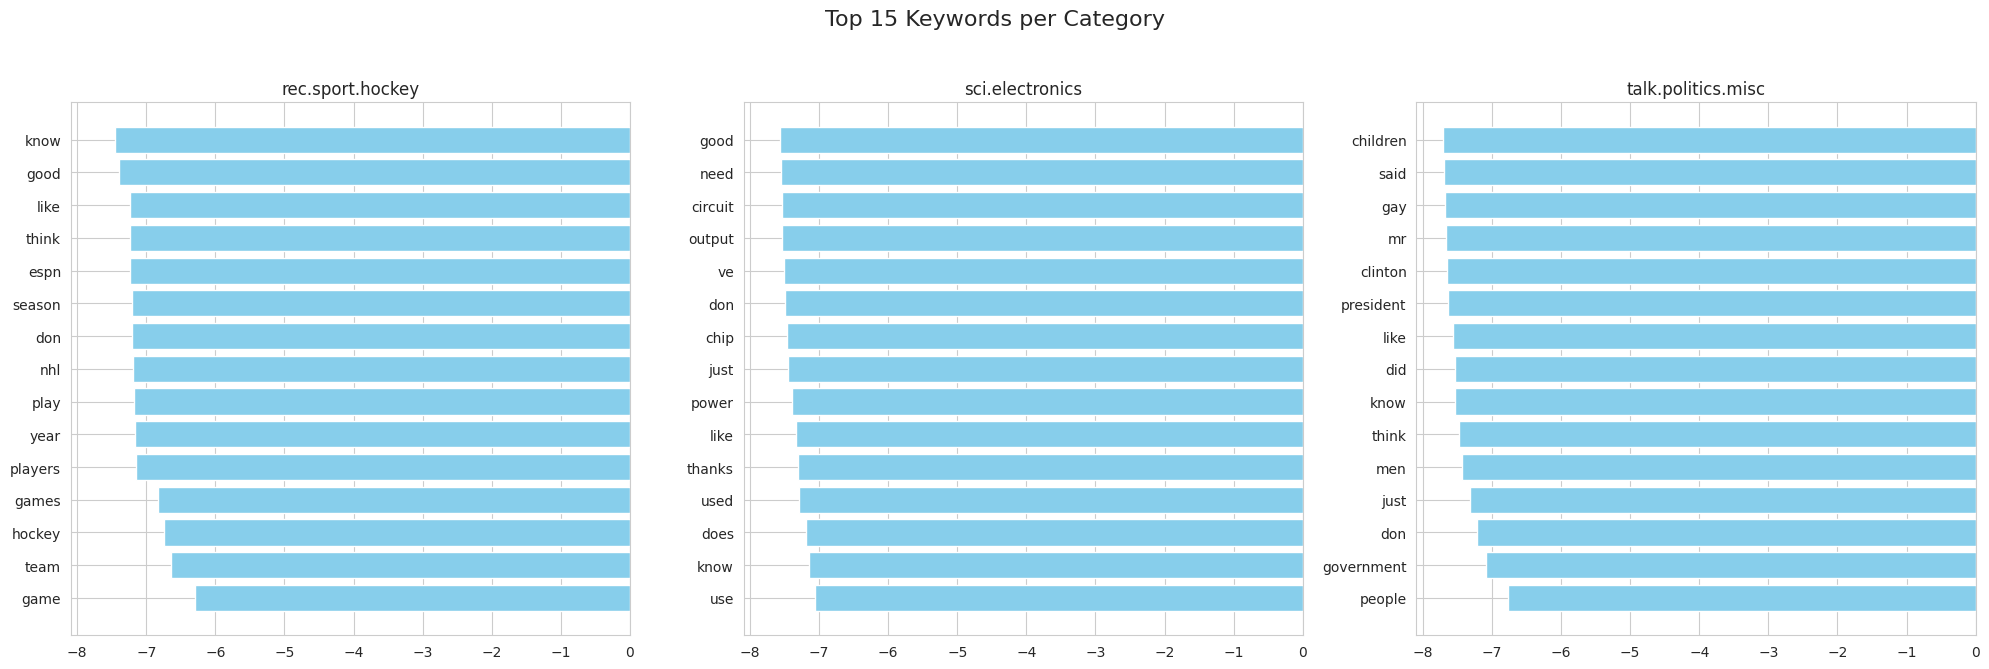


Testing the model with a new article...

New Article:
'
The government has recently announced a new set of economic policies aimed at
boosting technological innovation and research. This includes tax incen...'

---> Predicted Category: talk.politics.misc


In [4]:


# --- 1. Import Libraries ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Set plotting style for better visualizations
sns.set_style('whitegrid')
plt.style.use('seaborn-v0_8-deep')

# --- 2. Data Collection and Preprocessing ---

# Define the categories we want to classify
# You can expand this list with other categories from the 20 Newsgroups dataset
categories = [
    'rec.sport.hockey',  # Sports
    'talk.politics.misc',# Politics
    'sci.electronics'    # Technology
]

print("Loading dataset for categories:", categories)

# Fetch the dataset, removing headers, footers, and quotes to clean the data
# This acts as our initial preprocessing step.
news_data = fetch_20newsgroups(
    subset='all',
    categories=categories,
    shuffle=True,
    random_state=42,
    remove=('headers', 'footers', 'quotes')
)

# Print some information about the dataset
print(f"\nNumber of articles loaded: {len(news_data.data)}")
print(f"Number of categories: {len(news_data.target_names)}")

# Create a pandas DataFrame for easier handling and exploration
df = pd.DataFrame({'text': news_data.data, 'category': news_data.target})
df['category_name'] = df['category'].apply(lambda i: news_data.target_names[i])

# Handle missing data (empty articles)
df['text'] = df['text'].str.strip()  # Remove leading/trailing whitespace
df = df[df['text'] != '']           # Remove rows with empty text
print(f"Number of articles after removing empty ones: {len(df)}")


# --- 3. Exploratory Data Analysis (EDA) ---

print("\nPerforming Exploratory Data Analysis...")
plt.figure(figsize=(10, 6))
sns.countplot(x='category_name', data=df, palette='viridis')
plt.title('Distribution of News Articles by Category')
plt.xlabel('Category')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# --- 4. Feature Extraction (TF-IDF) ---

print("\nExtracting features using TF-IDF...")
# Use TF-IDF to convert text data into a matrix of numerical features.
# - stop_words='english': Removes common English words (like 'the', 'a', 'is').
# - max_df=0.95: Ignores terms that appear in more than 95% of the documents.
# - min_df=2: Ignores terms that appear in less than 2 documents.
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=2)

# Fit and transform the text data
X = vectorizer.fit_transform(df['text'])
y = df['category']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Shape of the TF-IDF matrix: {X.shape}")
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")


# --- 5. Model Development and Training ---

print("\nTraining and evaluating models...")

# Define the models to be trained
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "Support Vector Machine (SVM)": LinearSVC(random_state=42)
}

# Dictionary to store model performance scores
model_scores = {}

# Use 5-fold cross-validation to get a robust evaluation
for name, model in models.items():
    print(f"Performing 5-fold cross-validation for {name}...")
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    model_scores[name] = scores.mean()
    print(f"  - Mean Accuracy: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")

# Find the best model based on cross-validation accuracy
best_model_name = max(model_scores, key=model_scores.get)
best_model = models[best_model_name]
print(f"\nBest model based on cross-validation: {best_model_name} with accuracy {model_scores[best_model_name]:.4f}")

# Train the final best model on the entire training set
print(f"Training the final {best_model_name} model on the full training data...")
best_model.fit(X_train, y_train)


# --- 6. Model Evaluation ---

print("\nEvaluating the best model on the test set...")
y_pred = best_model.predict(X_test)

# Calculate final accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Final Test Accuracy: {accuracy:.4f}")

# Display a detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=news_data.target_names))

# Visualize the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=news_data.target_names,
            yticklabels=news_data.target_names)
plt.title(f'Confusion Matrix for {best_model_name}')
plt.xlabel('Predicted Category')
plt.ylabel('True Category')
plt.show()


# --- 7. Feature Importance ---
# This helps understand which words are most influential for classification.
# This is possible for linear models like Logistic Regression and SVM.

def plot_top_features(model, feature_names, n_top_features=15):
    """Plots the top N features (keywords) for each category."""
    # Naive Bayes stores coefficients differently
    if isinstance(model, MultinomialNB):
        coef = model.feature_log_prob_
    else:
        coef = model.coef_

    fig, axes = plt.subplots(1, len(model.classes_), figsize=(20, 7), sharex=True)
    fig.suptitle('Top 15 Keywords per Category', fontsize=16)

    for i, ax in enumerate(axes.flat):
        # Get top feature indices for the current class
        top_features_indices = coef[i].argsort()[-n_top_features:]
        top_features = feature_names[top_features_indices]
        top_features_coefs = coef[i][top_features_indices]

        ax.barh(top_features, top_features_coefs, color='skyblue')
        ax.set_title(news_data.target_names[i])
        ax.invert_yaxis()

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

print("\nIdentifying and plotting important features...")
# Get feature names from the TF-IDF vectorizer
feature_names = np.array(vectorizer.get_feature_names_out())
plot_top_features(best_model, feature_names)


# --- 8. Classifying a New, Unseen Article ---

print("\nTesting the model with a new article...")
# Example new article
new_article_text = """
The government has recently announced a new set of economic policies aimed at
boosting technological innovation and research. This includes tax incentives for
startups working in the field of artificial intelligence and semiconductor manufacturing.
"""

# 1. Preprocess and vectorize the new text
new_article_vector = vectorizer.transform([new_article_text])

# 2. Predict the category
predicted_category_index = best_model.predict(new_article_vector)
predicted_category_name = news_data.target_names[predicted_category_index[0]]

print(f"\nNew Article:\n'{new_article_text[:150]}...'")
print(f"\n---> Predicted Category: {predicted_category_name}")